In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def CriarSistema(n,M,f=np.array(1),eq=0):
    N = 2*n+1
    k = 1 + (2*np.random.random_sample(N+1)-1)*0.01
    A = np.zeros((N,N))
    b = np.zeros((N,f.size))
    for i in range(N):
        A[i,i] = -(k[i]+k[i+1])
    for i in range(N-1):
        A[i,i+1] = k[i+1]
        A[i+1,i] = k[i+1]
    if eq:
        b[n,:] -= f
    else: 
        A[n,:] /= M
    b[-1,:] = -k[-1]
    return A, b

def LinEQSolver(A,b,method="TGJ"):
    T = b.shape
    n = T[0]
    M = np.zeros((n,n+T[1]))
    M[:,:n] = A
    M[:,n:] = b
    if method == "TGJ":
        for i in range(n):
            Max = np.argmax(abs(M[:,i]))
            M[[i,Max],:] = M[[Max,i],:]
            M[i,:] /= M[i,i]

            M[i+1:,:] -= np.outer(M[i+1:,i],M[i,:])
            M[:i,:] -= np.outer(M[:i,i],M[i,:])
        return M[:,n:]


    

In [108]:
LinEQSolver(np.array([[1,2,3],
                      [3,-3,4],
                      [9,1,2]]),np.array([[0,0,2],
                                          [9,9,1]]).T)

array([[ 0.24285714, -0.58571429],
       [ 0.07142857,  0.35714286],
       [-0.12857143,  2.95714286]])

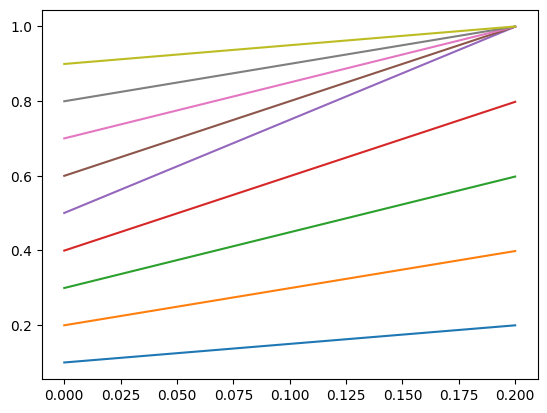

In [117]:
F = np.linspace(0,0.2,10)
M = 5
n = 4
Args = CriarSistema(n,M,F,1)
Xeq = LinEQSolver(Args[0],Args[1])
plt.plot(F,Xeq.T)
plt.show()

In [123]:
A = CriarSistema(5,1)[0]
print((A-A.T==0).all())
A = CriarSistema(5,2)[0]
print((A-A.T==0).all())

True
False
